# DECISION TREE on auctions dataset

## Problem statement

* The file auctions.csv contains information on 1972 auctions that transacted on eBay.com during May–June 2004.
* The goal is to use these data to build a model that will classify auctions as competitive or noncompetitive.
* A competitive auction is defined as an auction with at least two bids placed on the item auctioned. * The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close).
* In addition, we have the price at which the auction closed. The task is to predict whether or not the auction will be competitive.
* Build a classification model to predict if an auction will be competitive or not
* Identify the important variables that impact the prediction

#### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline


#### Loading

In [2]:
#Read the csv file
df = pd.read_csv('auctions.csv')
df=df.drop(['ClosePrice'], axis=1)
df.columns

Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'OpenPrice', 'Competitive'],
      dtype='object')

#### To Check Data is Numeric or Categorical?


In [3]:
#Convert relevant columns to categorical variable
df['Competitive'] = df['Competitive'].astype('category')





#Get info about datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 7 columns):
Category        1972 non-null object
currency        1972 non-null object
sellerRating    1972 non-null int64
Duration        1972 non-null int64
endDay          1972 non-null object
OpenPrice       1972 non-null float64
Competitive     1972 non-null category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 94.5+ KB


In [4]:
df['Competitive'].value_counts(normalize = True)

1    0.540568
0    0.459432
Name: Competitive, dtype: float64

In [ ]:
df['price_diff']=df['ClosePrice']-df['OpenPrice']
df['price_diff'].describe()

In [6]:
#Create dataframes for X and Y variables
x = df.drop(["Competitive"], axis=1)
y = df[['Competitive']]


In [9]:
##Convert x to dummy variables
x=pd.get_dummies(x)
x.columns

Index(['sellerRating', 'Duration', 'OpenPrice', 'Category_Antique/Art/Craft',
       'Category_Automotive', 'Category_Books', 'Category_Business/Industrial',
       'Category_Clothing/Accessories', 'Category_Coins/Stamps',
       'Category_Collectibles', 'Category_Computer', 'Category_Electronics',
       'Category_EverythingElse', 'Category_Health/Beauty',
       'Category_Home/Garden', 'Category_Jewelry', 'Category_Music/Movie/Game',
       'Category_Photography', 'Category_Pottery/Glass',
       'Category_SportingGoods', 'Category_Toys/Hobbies', 'currency_EUR',
       'currency_GBP', 'currency_US', 'endDay_Fri', 'endDay_Mon', 'endDay_Sat',
       'endDay_Sun', 'endDay_Thu', 'endDay_Tue', 'endDay_Wed'],
      dtype='object')

In [10]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

In [11]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1380, 31) (1380, 1)
(592, 31) (592, 1)


## Splitting the dataset

## Model1:- Criterion='gini'

In [12]:
model1=DecisionTreeClassifier()

In [13]:
model1.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
preds = model1.predict(X_test)

## Evaluation Metrics

In [15]:
#Confusion matrix
#Predict for train set


from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_test,preds)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[178  82]
 [ 96 236]]


## Model1:- Criterion='entropy'

In [16]:
model2=DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [17]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
preds2 = model2.predict(X_test)

## Evaluation Metrics

In [19]:
#Confusion matrix
#Predict for train set


from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_test,preds2)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[180  80]
 [101 231]]


In [20]:
np.round(model2.feature_importances_,3)

array([0.265, 0.071, 0.367, 0.014, 0.008, 0.025, 0.013, 0.005, 0.   ,
       0.014, 0.   , 0.002, 0.004, 0.014, 0.003, 0.004, 0.026, 0.   ,
       0.004, 0.011, 0.019, 0.016, 0.   , 0.005, 0.023, 0.018, 0.011,
       0.016, 0.018, 0.011, 0.013])

In [21]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [22]:
feature_cols = x.columns

In [23]:
model_pruned=DecisionTreeClassifier(max_depth=3)
model_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
x.OpenPrice.nunique()

291

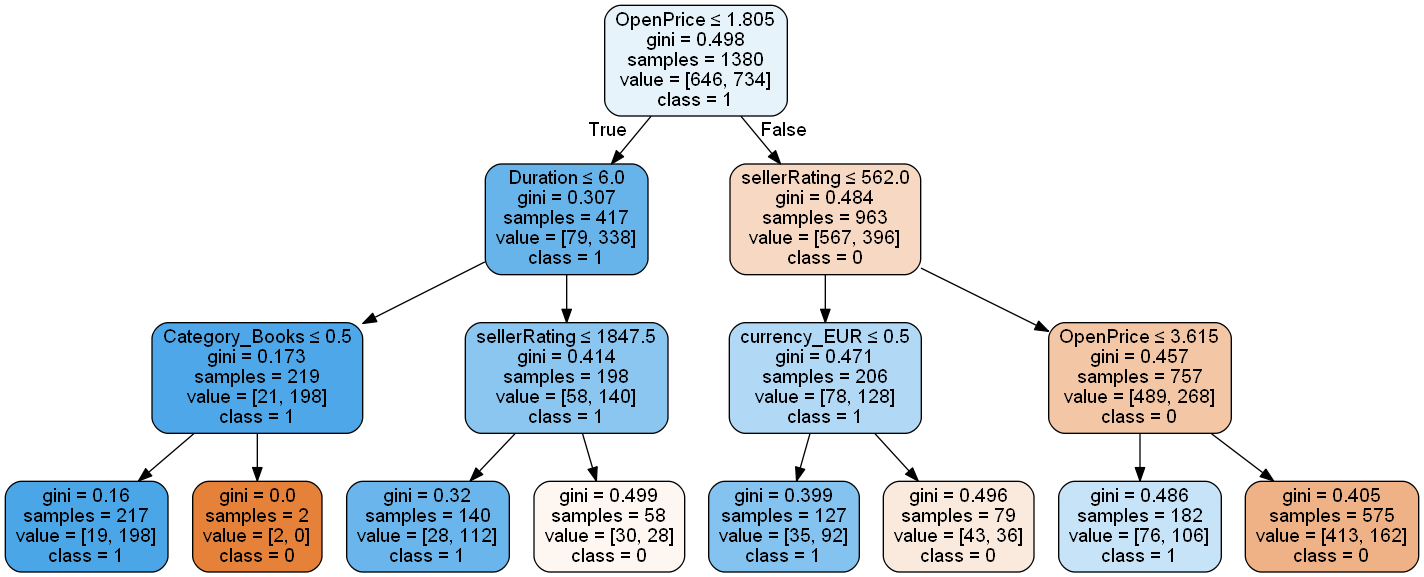

In [31]:
dot_data = StringIO()
export_graphviz(model_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_entropy.png')
Image(graph.create_png())

In [28]:
print(dict(zip(df.columns, np.round(model_pruned.feature_importances_,3))))

{'Category': 0.187, 'currency': 0.048, 'sellerRating': 0.703, 'Duration': 0.0, 'endDay': 0.0, 'OpenPrice': 0.02, 'Competitive': 0.0}


In [29]:
dict_varimp = dict(zip(x.columns, np.round(model1.feature_importances_,3)))

In [30]:
df_varimp = pd.DataFrame.from_dict(dict_varimp, orient='index')

In [124]:
df_varimp = df_varimp.sort_values(by=0, ascending=False)
df_varimp

,0
OpenPrice,0.400
sellerRating,0.233
Duration,0.058
Category_Music/Movie/Game,0.026
Category_Books,0.025
Category_Toys/Hobbies,0.022
endDay_Mon,0.020
endDay_Thu,0.017
Category_Collectibles,0.017
endDay_Fri,0.014


In [126]:
# store the predicted probabilities for class 1
y_pred_prob = model_pruned.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([0.58241758, 0.8       , 0.28173913, 0.28173913, 0.28173913,
       0.9124424 , 0.9124424 , 0.28173913, 0.48275862, 0.28173913,
       0.4556962 , 0.58241758, 0.28173913, 0.72440945, 0.48275862,
       0.58241758, 0.28173913, 0.28173913, 0.9124424 ])

Text(0,0.5,'Frequency')

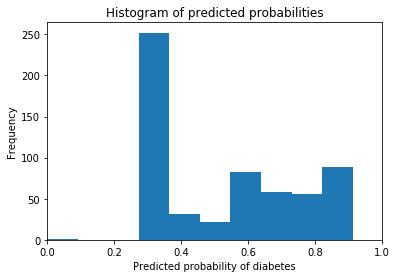

In [127]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [128]:
## Changing the cut off value for prediction
pred_proba_df = pd.DataFrame(model_pruned.predict_proba(X_test))
threshold_list = [0.05,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.56
[[  1 259]
 [  0 332]]

******** For i = 0.1 ******
Our testing accuracy is 0.56
[[  1 259]
 [  0 332]]

******** For i = 0.2 ******
Our testing accuracy is 0.56
[[  1 259]
 [  0 332]]

******** For i = 0.25 ******
Our testing accuracy is 0.56
[[  1 259]
 [  0 332]]

******** For i = 0.3 ******
Our testing accuracy is 0.69
[[166  94]
 [ 87 245]]

******** For i = 0.35 ******
Our testing accuracy is 0.69
[[166  94]
 [ 87 245]]

******** For i = 0.4 ******
Our testing accuracy is 0.69
[[166  94]
 [ 87 245]]

******** For i = 0.45 ******
Our testing accuracy is 0.69
[[166  94]
 [ 87 245]]

******** For i = 0.5 ******
Our testing accuracy is 0.69
[[191  69]
 [115 217]]

******** For i = 0.6 ******
Our testing accuracy is 0.63
[[216  44]
 [173 159]]

******** For i = 0.7 ******
Our testing accuracy is 0.63
[[216  44]
 [173 159]]


In [129]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix



In [130]:
clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 4, 5,6,7,8],
    }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [131]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [132]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 7}

Confusion matrix of optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       173        87
pos        90       242


In [133]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth']].round(3)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth
3,0.776,0.732,0.744,6
1,0.771,0.703,0.730,4
2,0.769,0.702,0.728,5
4,0.765,0.737,0.740,7
5,0.764,0.722,0.734,8
0,0.745,0.670,0.701,3


In [134]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]


In [135]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [136]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    
   

In [137]:
precision_recall_threshold(p, r, thresholds, 0.17)

     pred_neg  pred_pos
neg        71       189
pos        39       293


In [138]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

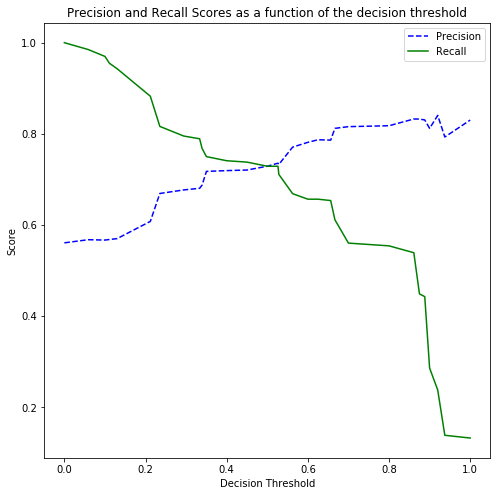

In [139]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)